# Customer Segmentation

In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

## Load the data

Data avaiable at: https://www.kaggle.com/vetrirah/customer

In [ ]:
!unzip 'archive.zip'

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
test_labels = pd.read_csv("sample_submission.csv")

In [3]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
test_labels

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A
...,...,...
2622,467954,A
2623,467958,A
2624,467960,A
2625,467961,A


In [5]:
assert(test_labels['ID'].all()==test['ID'].all())

In [6]:
test_labels = test_labels['Segmentation']

In [7]:
test['Segmentation'] = test_labels

In [8]:
ds = pd.concat([train, test], ignore_index=True)
ds

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,A
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,A
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,A


## Explore the data

In [9]:
ds.shape

(10695, 11)

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


* **ID**: Unique ID. 
* **Gender**: Gender of the customer.
* **Ever_Married**: Marital status of the customer
* **Age**: Age of the customer.
* **Graduated**: Is the customer a graduate ?
* **Profession**: Profession of the customer.
* **Work_Experience**: Work Experience in years.
* **Spending_Score**: Spending score of the customer.
* **Family_Size**: Number of family members for the customer (including the customer).
* **Var_1**: Anonymised Category for the customer.
* **Segmentation**: Target Label, segment of the customer. 

In [11]:
ds.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


## Data Pre-processing

Distribuzione dei valori nulli nel dataframe

In [12]:
# missing values
pd.set_option("max_columns",11)
pd.DataFrame(ds.isnull().sum()/ds.shape[0]).T

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.0,0.0,0.017765,0.0,0.009537,0.015147,0.102665,0.0,0.041889,0.010098,0.0


Vediamo come riempire i valori mancanti per ogni singolo attributo

### Family size

Creiamo un dataframe con le entry che hanno family size nulla

In [13]:
nanFam_df = ds[ds['Family_Size'].isna()]
nanFam_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
12,461230,Female,No,19,No,Executive,0.0,Low,NaN,Cat_3,D
33,467010,Male,No,26,No,Homemaker,9.0,Low,NaN,Cat_6,D
59,460881,Male,Yes,72,Yes,Lawyer,1.0,Low,NaN,Cat_4,D
112,467758,Female,Yes,50,Yes,Doctor,1.0,Low,NaN,Cat_6,B
126,466295,Female,Yes,42,No,Engineer,0.0,Low,NaN,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10520,467385,Male,No,53,No,Artist,1.0,Low,NaN,Cat_4,A
10521,467389,Male,No,42,No,Engineer,0.0,Low,NaN,Cat_6,A
10564,467518,Male,No,22,No,Doctor,1.0,Low,NaN,Cat_6,A
10575,467570,Male,No,18,No,Healthcare,14.0,Low,NaN,Cat_6,A


In [14]:
nanFam_df.groupby('Spending_Score').size()

Spending_Score
Average     44
High        37
Low        367
dtype: int64

In [15]:
nanFam_df.groupby('Ever_Married').size()

Ever_Married
No     244
Yes    190
dtype: int64

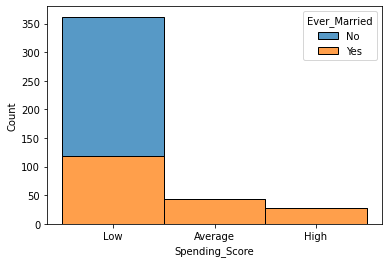

In [16]:
sns.histplot(data=nanFam_df, x="Spending_Score", hue='Ever_Married', multiple="stack")

Tutti gli individui mai sposati hanno uno spending score basso, per cui possiamo supporre che individui con ever_Married="No" abbiano family_Size=1.

Per gli altri individui, supponiamo che il nucleo familiare sia **almeno pari** a 2. Per cui assegnamo il *max(2,mean(family_size))*.

Riempio prima i valori nulli con 0 per poter calcolare la media:

In [17]:
ds = ds.fillna({'Family_Size': 0.0})

Quindi discretizzo i valori dell'attributo:

In [18]:
ds.Family_Size = ds.Family_Size.astype(np.int32)

In [19]:
np.mean(ds.Family_Size)

2.724918186068256

In [20]:
ds.loc[(ds['Family_Size']==0.0) & (ds['Ever_Married'] == 'No'), 'Family_Size'] = 1
ds.loc[(ds['Family_Size']==0.0) & (ds['Ever_Married'] == 'Yes'), 'Family_Size'] = np.max([2, 3])
ds.loc[(ds['Family_Size']==0.0) & (pd.isnull(ds['Ever_Married'])), 'Family_Size'] = 1

In [21]:
np.unique(ds.Family_Size==0)

array([False])

### Work Experience

In [22]:
ds.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6,Cat_6,A


In [23]:
ds.groupby('Work_Experience')[['Work_Experience']].count()

,Work_Experience
Work_Experience,
0.0,3087
1.0,3127
2.0,373
3.0,337
4.0,346
5.0,270
6.0,265
7.0,256
8.0,612


Osserviamo la distribuzione dei valori dell'attributo:

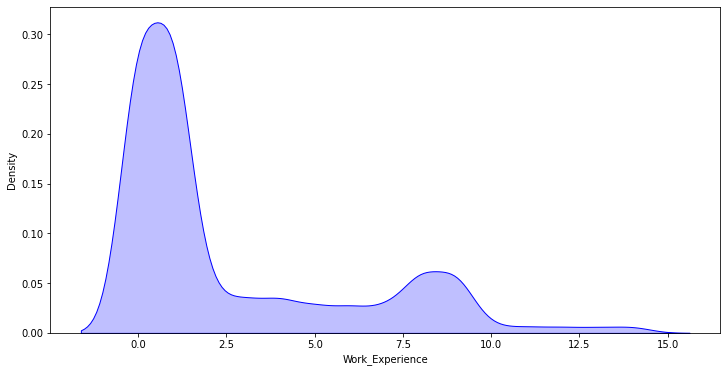

In [24]:
plt.figure(figsize=(12,6))
sns.kdeplot(ds["Work_Experience"],shade=True,
            color="b",label="Anni di lavoro")
plt.show()

Vediamo che la maggior parte ha valore compreso tra 0 e 1 e che il valore massimo è 15. Questo è piuttosto inverosimile. Facciamo un ulteriore check considerando anche l'età degli individui.

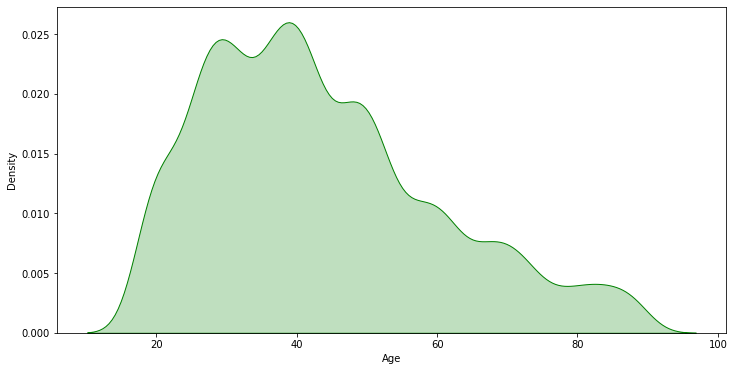

In [25]:
plt.figure(figsize=(12,6))
sns.kdeplot(ds["Age"],shade=True,
            color="g",label="Età")
plt.show()

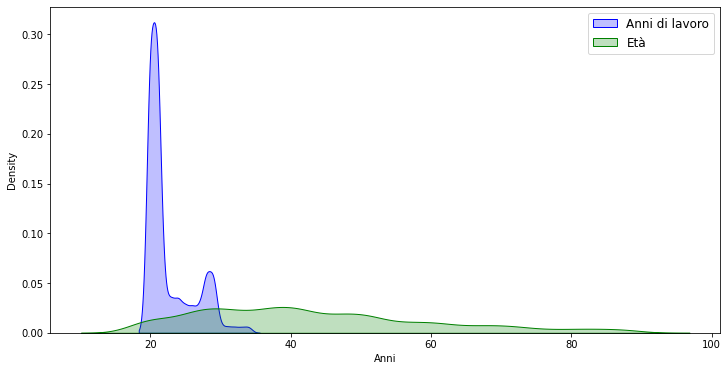

In [26]:
plt.figure(figsize=(12,6))
sns.kdeplot(ds["Work_Experience"]+20,shade=True,
            color="b",label="Anni di lavoro")
sns.kdeplot(ds["Age"],shade=True,
            color="g",label="Età")
plt.legend(loc="best",prop = {"size" : 12})
plt.xlabel("Anni")
plt.show()

Dai grafici possiamo determinare che l'attributo ha scarso contenuto informativo e per questo lo droppiamo.

In [27]:
ds = ds.drop(columns='Work_Experience')

### Married

In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              10695 non-null  int64 
 1   Gender          10695 non-null  object
 2   Ever_Married    10505 non-null  object
 3   Age             10695 non-null  int64 
 4   Graduated       10593 non-null  object
 5   Profession      10533 non-null  object
 6   Spending_Score  10695 non-null  object
 7   Family_Size     10695 non-null  int64 
 8   Var_1           10587 non-null  object
 9   Segmentation    10695 non-null  object
dtypes: int64(3), object(7)
memory usage: 835.7+ KB


In [29]:
ds.groupby('Ever_Married')[['Family_Size']].mean()

,Family_Size
Ever_Married,
No,2.880700
Yes,2.747688


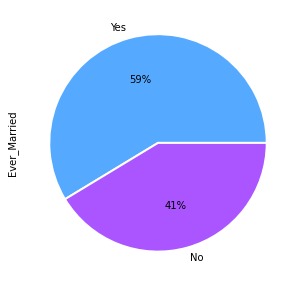

In [30]:
plt.figure(figsize=(5,5))
ds["Ever_Married"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("cool",2),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.show()

In [31]:
nanMarr = ds[ds['Ever_Married'].isna()]
nanMarr

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation
24,461021,Female,NaN,58,No,Executive,Average,3,Cat_3,B
108,466466,Female,NaN,19,No,Healthcare,Low,5,Cat_3,D
201,466065,Male,NaN,19,No,Healthcare,Low,3,Cat_3,D
213,460516,Female,NaN,85,No,Lawyer,High,1,Cat_3,C
272,464841,Male,NaN,19,No,Entertainment,High,3,Cat_4,D
...,...,...,...,...,...,...,...,...,...,...
10357,466804,Female,NaN,35,Yes,Homemaker,Low,1,Cat_3,A
10358,466807,Female,NaN,35,Yes,Healthcare,Low,1,Cat_4,A
10439,467129,Female,NaN,49,No,Marketing,Average,3,Cat_4,A
10504,467339,Male,NaN,62,Yes,Artist,Average,3,Cat_6,A


In [32]:
nanMarr.groupby('Family_Size').size()

Family_Size
1    48
2    40
3    45
4    32
5    17
6     5
7     1
8     2
dtype: int64

In [33]:
nanMarr.groupby('Family_Size')[['Age']].mean()

,Age
Family_Size,
1,44.979167
2,47.525000
3,39.577778
4,38.437500
5,38.941176
6,33.200000
7,23.000000
8,28.000000


Effettuiamo il filling secondo la stessa strategia usata per family_size, quindi diamo 'yes' agli individui con *family_size > 1* e 'no' agli altri.

In [34]:
ds.loc[pd.isnull(ds['Ever_Married']) & (ds['Family_Size'] == 1), 'Ever_Married'] = 'No'
ds.loc[pd.isnull(ds['Ever_Married']) & (ds['Family_Size'] > 1), 'Ever_Married'] = 'Yes'

In [35]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              10695 non-null  int64 
 1   Gender          10695 non-null  object
 2   Ever_Married    10695 non-null  object
 3   Age             10695 non-null  int64 
 4   Graduated       10593 non-null  object
 5   Profession      10533 non-null  object
 6   Spending_Score  10695 non-null  object
 7   Family_Size     10695 non-null  int64 
 8   Var_1           10587 non-null  object
 9   Segmentation    10695 non-null  object
dtypes: int64(3), object(7)
memory usage: 835.7+ KB


### Graduated

In [36]:
ds.groupby('Graduated').size()

Graduated
No     4023
Yes    6570
dtype: int64

In [37]:
ds.groupby('Graduated')[['Age']].mean()

,Age
Graduated,
No,38.442953
Yes,46.578843


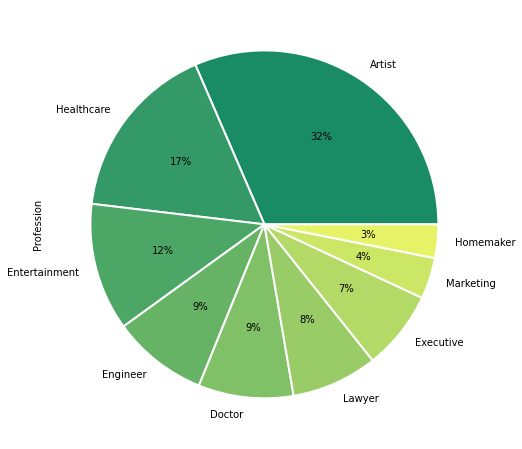

In [38]:
plt.figure(figsize=(8,8))
ds['Profession'].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("summer",9),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.show()

Nel campione c'è una prevalenza di artisti. Vediamo come sono distribuite le professioni in base all'attributo Graduated.

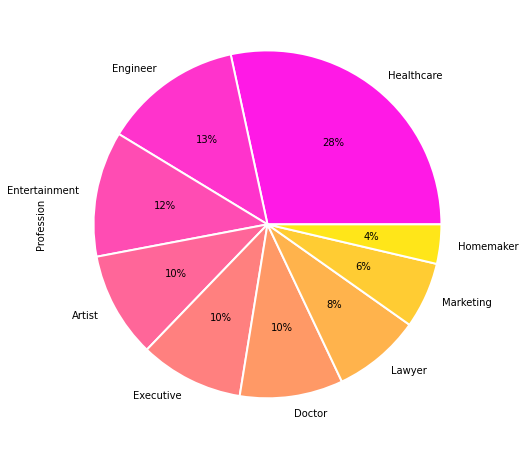

In [39]:
plt.figure(figsize=(8,8))
ds.loc[ds["Graduated"]=='No', 'Profession'].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("spring",9),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.show()

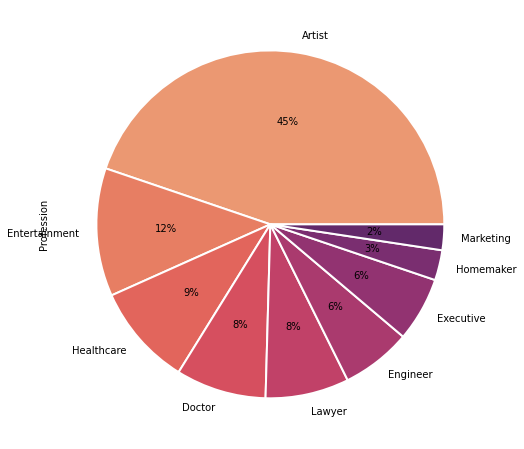

In [40]:
plt.figure(figsize=(8,8))
ds.loc[ds["Graduated"]=='Yes', 'Profession'].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("flare",9),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.show()

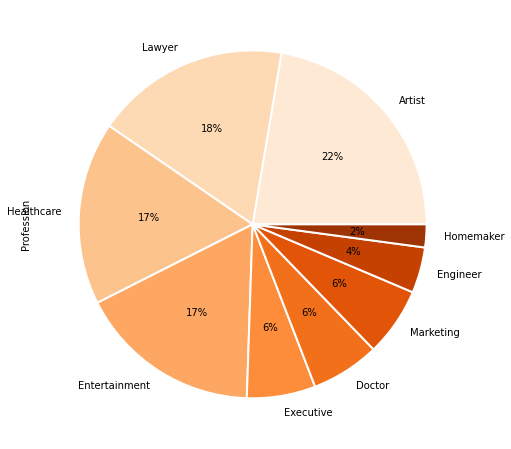

In [41]:
plt.figure(figsize=(8,8))
ds.loc[ds["Graduated"].isna(), 'Profession'].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("Oranges",9),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.show()

Supponiamo che gli avvocati, i dottori e gli ingegneri siano tutti laureati! Come possono non esserlo? C'è un errore nel campionamento di quale dei 2 attributi? Per ora lasciamo così e usiamo solo la seguente strategia di refilling:

In [42]:
def checkProf(Grad, Prof):
  if pd.isnull(Grad):
    if Prof in ['Doctor','Lawyer','Engineer']:
      return 'Yes'
    else:
      return 'No'
  return Grad

In [43]:
ds['Graduated'] = ds.apply(lambda x: checkProf(x['Graduated'],x['Profession']), axis=1)

In [44]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              10695 non-null  int64 
 1   Gender          10695 non-null  object
 2   Ever_Married    10695 non-null  object
 3   Age             10695 non-null  int64 
 4   Graduated       10695 non-null  object
 5   Profession      10533 non-null  object
 6   Spending_Score  10695 non-null  object
 7   Family_Size     10695 non-null  int64 
 8   Var_1           10587 non-null  object
 9   Segmentation    10695 non-null  object
dtypes: int64(3), object(7)
memory usage: 835.7+ KB


### Profession

In [45]:
nanProf_df = ds[ds['Profession'].isna()]
nanProf_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation
79,466567,Female,No,49,Yes,NaN,Low,1,Cat_6,D
118,465827,Male,No,27,No,NaN,Low,7,Cat_4,D
219,465837,Male,No,62,Yes,NaN,Low,1,Cat_6,A
237,467252,Female,No,33,Yes,NaN,Low,4,NaN,D
437,461410,Male,Yes,79,No,NaN,Average,2,NaN,C
...,...,...,...,...,...,...,...,...,...,...
10453,467160,Male,Yes,43,No,NaN,Average,2,Cat_3,A
10510,467357,Male,Yes,55,Yes,NaN,Low,2,Cat_6,A
10519,467384,Male,No,41,Yes,NaN,Low,1,Cat_6,A
10592,467623,Male,Yes,77,Yes,NaN,High,2,Cat_6,A


Piuttosto che dropppare le righe con professione ignota, cerchiamo di riempire i valori mancanti sulla base dello spending score e di altri attributi.

In [46]:
nanProf_df.groupby('Spending_Score').size()

Spending_Score
Average     44
High        16
Low        102
dtype: int64

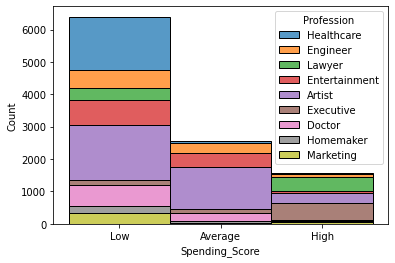

In [47]:
sns.histplot(data=ds, x="Spending_Score", hue='Profession', multiple="stack")

In [48]:
ds[ds.Spending_Score=='Low'].groupby('Profession').size()

Profession
Artist           1689
Doctor            642
Engineer          559
Entertainment     768
Executive         166
Healthcare       1641
Homemaker         216
Lawyer            379
Marketing         332
dtype: int64

In [49]:
ds[ds.Spending_Score=='Average'].groupby('Profession').size()

Profession
Artist           1312
Doctor            246
Engineer          300
Entertainment     420
Executive          95
Healthcare         54
Homemaker          78
Lawyer             24
Marketing          26
dtype: int64

In [50]:
ds[ds.Spending_Score=='High'].groupby('Profession').size()

Profession
Artist           317
Doctor            42
Engineer          76
Entertainment     62
Executive        514
Healthcare        55
Homemaker         34
Lawyer           441
Marketing         45
dtype: int64

Intanto riempiamo i valori nulli per spending_score="Low" con "Healthcare"

In [51]:
ds.loc[pd.isnull(ds['Profession']) & (ds['Spending_Score'] == 'Low'), 'Profession'] = 'Healthcare'

Esaminiamo gli individui con spending score elevato, considerando solo le professioni "lawyer" e "executive" per trovare dei punti di correlazione.

In [52]:
ds[ds['Spending_Score']=='High'][ds['Profession']=='Executive']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation
101,466911,Male,Yes,68,No,Executive,High,7,Cat_6,B
103,463426,Male,Yes,38,No,Executive,High,5,Cat_6,A
114,467905,Male,Yes,43,Yes,Executive,High,3,Cat_6,D
120,464481,Male,Yes,46,Yes,Executive,High,3,Cat_6,C
121,461011,Male,Yes,55,No,Executive,High,4,Cat_3,B
...,...,...,...,...,...,...,...,...,...,...
10612,467694,Male,Yes,56,Yes,Executive,High,2,Cat_6,A
10618,467715,Male,Yes,45,Yes,Executive,High,3,Cat_6,A
10625,467733,Male,Yes,56,No,Executive,High,3,Cat_6,A
10673,467905,Male,Yes,37,Yes,Executive,High,3,Cat_6,A


In [53]:
ds[ds['Spending_Score']=='High'][ds['Profession']=='Executive'].groupby('Gender').size()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Gender
Female     16
Male      498
dtype: int64

In [54]:
ds[ds['Spending_Score']=='High'][ds['Profession']=='Executive'].groupby('Graduated').size()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Graduated
No     223
Yes    291
dtype: int64

In [55]:
ds[ds['Spending_Score']=='High'][ds['Profession']=='Lawyer']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation
3,461735,Male,Yes,67,Yes,Lawyer,High,2,Cat_6,B
34,459861,Female,Yes,83,No,Lawyer,High,2,Cat_6,D
45,463156,Female,Yes,79,No,Lawyer,High,2,Cat_6,A
62,464091,Male,Yes,74,Yes,Lawyer,High,3,Cat_6,D
63,464535,Male,Yes,56,Yes,Lawyer,High,2,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
10604,467669,Male,Yes,82,No,Lawyer,High,2,Cat_6,A
10616,467707,Male,Yes,89,Yes,Lawyer,High,2,Cat_6,A
10621,467726,Male,Yes,82,Yes,Lawyer,High,2,Cat_6,A
10626,467734,Male,Yes,88,Yes,Lawyer,High,2,Cat_6,A


In [56]:
ds[ds['Spending_Score']=='High'][ds['Profession']=='Lawyer'].groupby('Gender').size()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Gender
Female    258
Male      183
dtype: int64

In [57]:
ds[ds['Spending_Score']=='High'][ds['Profession']=='Lawyer'].groupby('Family_Size').size()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Family_Size
1      7
2    357
3     55
4     14
5      1
7      2
9      5
dtype: int64

Abbiamo evidenziato una correlazione tra:
- Avvocati con nucleo familiare 2
- Uomini di professione Executive<br>

Usiamo queste info per riempire i valori nulli

In [58]:
ds.loc[pd.isnull(ds['Profession']) & (ds['Spending_Score'] == 'High') & (ds['Gender'] == 'Male'), 'Profession'] = 'Executive'
ds.loc[pd.isnull(ds['Profession']) & (ds['Spending_Score'] == 'High') & (ds['Family_Size'] == 2), 'Profession'] = 'Lawyer'

Vediamo a che punto siamo col riempimento

In [59]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              10695 non-null  int64 
 1   Gender          10695 non-null  object
 2   Ever_Married    10695 non-null  object
 3   Age             10695 non-null  int64 
 4   Graduated       10695 non-null  object
 5   Profession      10650 non-null  object
 6   Spending_Score  10695 non-null  object
 7   Family_Size     10695 non-null  int64 
 8   Var_1           10587 non-null  object
 9   Segmentation    10695 non-null  object
dtypes: int64(3), object(7)
memory usage: 835.7+ KB


Per evitare di fare errori droppiamo le righe rimanenti, cioè quelle che hanno spending score medio, dal momento che è difficile determinare una professione.

In [60]:
ds = ds.dropna(subset=['Profession'])

In [61]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10650 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              10650 non-null  int64 
 1   Gender          10650 non-null  object
 2   Ever_Married    10650 non-null  object
 3   Age             10650 non-null  int64 
 4   Graduated       10650 non-null  object
 5   Profession      10650 non-null  object
 6   Spending_Score  10650 non-null  object
 7   Family_Size     10650 non-null  int64 
 8   Var_1           10543 non-null  object
 9   Segmentation    10650 non-null  object
dtypes: int64(3), object(7)
memory usage: 915.2+ KB


### Var_1

In [62]:
ds["Var_1"] = ds["Var_1"].astype('category')

In [63]:
ds.Var_1

0        Cat_4
1        Cat_4
2        Cat_6
3        Cat_6
4        Cat_6
         ...  
10690    Cat_6
10691    Cat_6
10692    Cat_6
10693    Cat_4
10694    Cat_7
Name: Var_1, Length: 10650, dtype: category
Categories (7, object): ['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7']

In [64]:
ds["Var_1"] = ds["Var_1"].cat.codes

In [65]:
ds.Var_1

0        3
1        3
2        5
3        5
4        5
        ..
10690    5
10691    5
10692    5
10693    3
10694    6
Name: Var_1, Length: 10650, dtype: int8

In [66]:
len(np.unique(ds.Var_1))

8

Riempio i valori nulli con la media

In [67]:
ds = ds.fillna({'Var_1': np.mean(ds.Var_1)})

In [68]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10650 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              10650 non-null  int64 
 1   Gender          10650 non-null  object
 2   Ever_Married    10650 non-null  object
 3   Age             10650 non-null  int64 
 4   Graduated       10650 non-null  object
 5   Profession      10650 non-null  object
 6   Spending_Score  10650 non-null  object
 7   Family_Size     10650 non-null  int64 
 8   Var_1           10650 non-null  int8  
 9   Segmentation    10650 non-null  object
dtypes: int64(3), int8(1), object(6)
memory usage: 842.4+ KB


In [69]:
ds.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,Low,4,3,D
1,462643,Female,Yes,38,Yes,Engineer,Average,3,3,A
2,466315,Female,Yes,67,Yes,Engineer,Low,1,5,B
3,461735,Male,Yes,67,Yes,Lawyer,High,2,5,B
4,462669,Female,Yes,40,Yes,Entertainment,High,6,5,A


In [70]:
ds.shape

(10650, 10)

## Some plots and analysis...

Male/Female

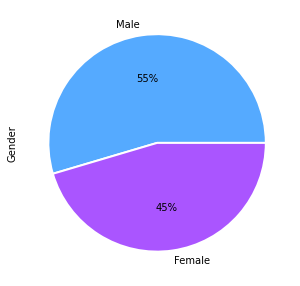

In [71]:
plt.figure(figsize=(5,5))
ds["Gender"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("cool",2),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.show()

Age distribution

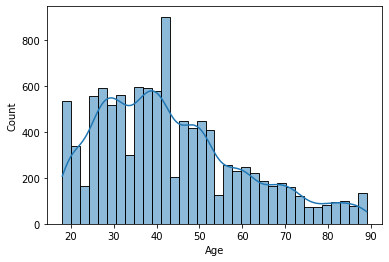

In [72]:
sns.histplot(data=ds, x="Age", kde=True)

Spending score

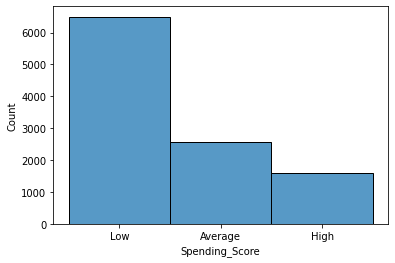

In [73]:
sns.histplot(data=ds, x="Spending_Score")

Age/Spending score

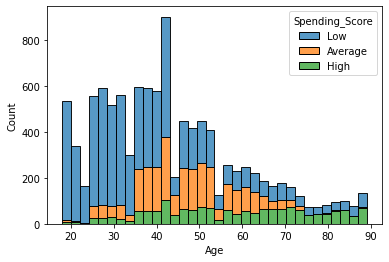

In [74]:
sns.histplot(data=ds, x="Age", hue='Spending_Score', multiple="stack")

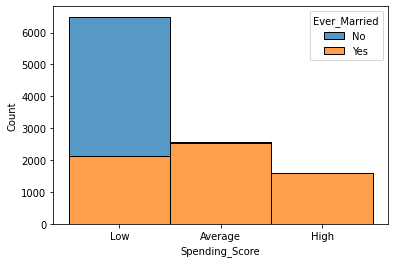

In [75]:
sns.histplot(data=ds, x="Spending_Score", hue='Ever_Married', multiple="stack")

Family size/Spending score

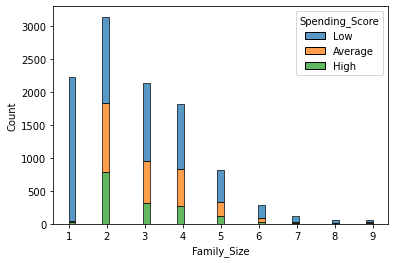

In [76]:
sns.histplot(data=ds, x='Family_Size', hue='Spending_Score', multiple='stack')

Profession/Spending score

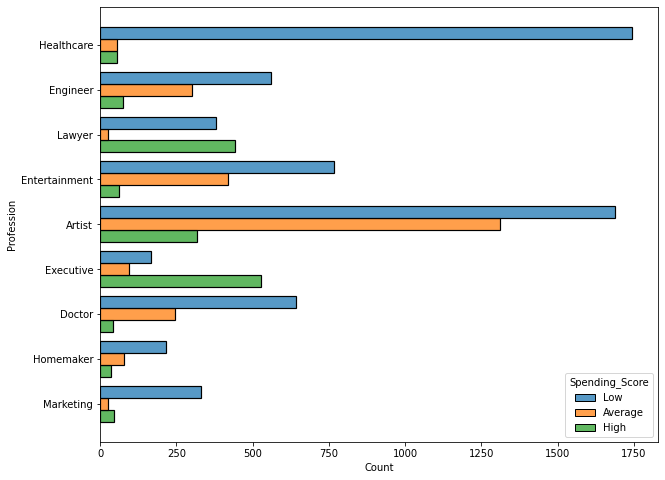

In [77]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=ds, y="Profession", hue="Spending_Score", multiple="dodge", shrink=.8)

Profession/Graduated

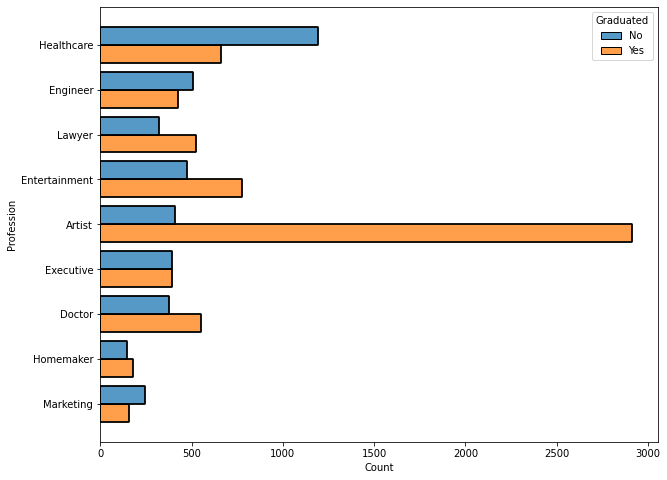

In [78]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=ds, y="Profession", hue="Graduated", multiple="dodge", shrink=.8)

### Plots with Segmentation attribute

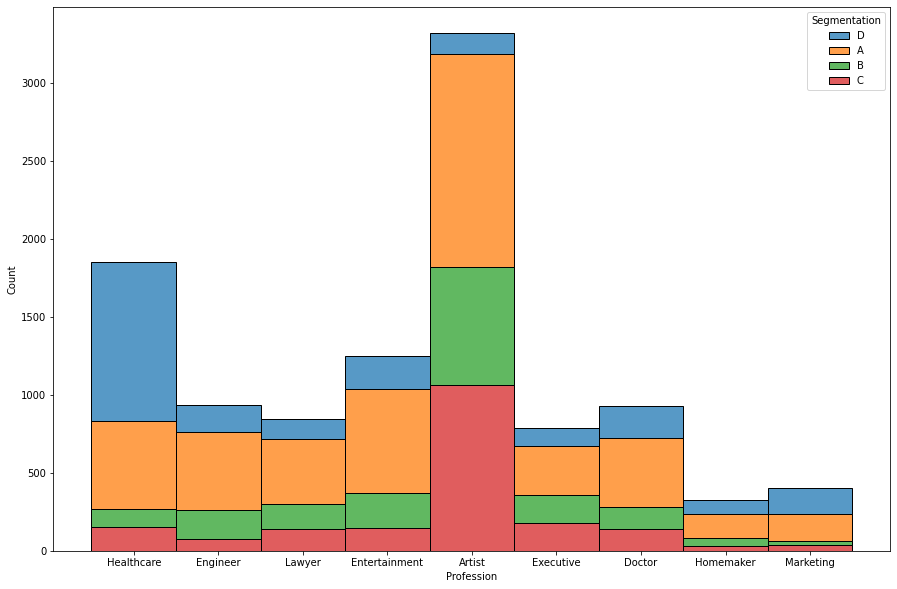

In [88]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data=ds, x="Profession", hue='Segmentation', multiple="stack")

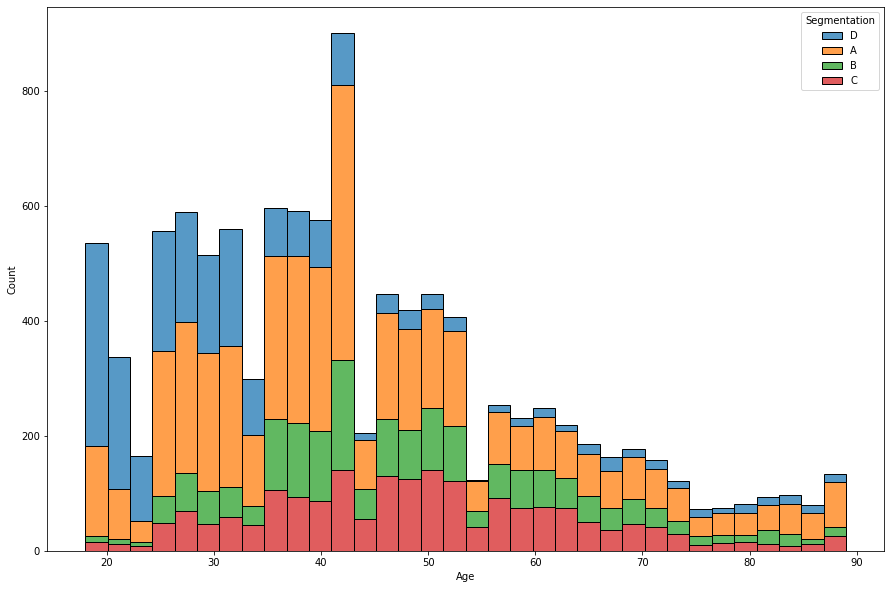

In [82]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data=ds, x="Age", hue='Segmentation', multiple="stack")

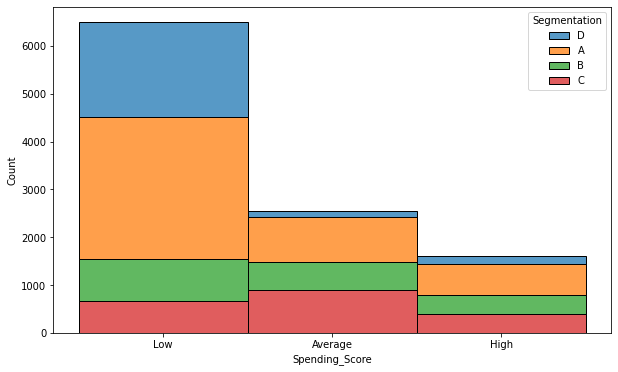

In [85]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=ds, x="Spending_Score", hue='Segmentation', multiple="stack")

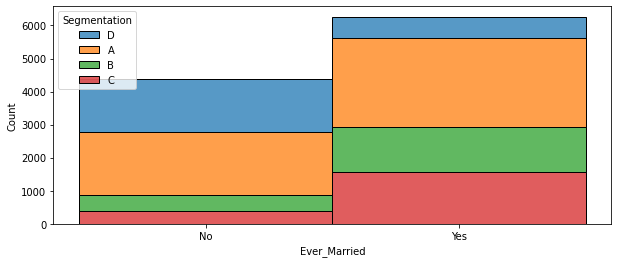

In [86]:
plt.figure(figsize=(10,4))
ax = sns.histplot(data=ds, x="Ever_Married", hue='Segmentation', multiple="stack")

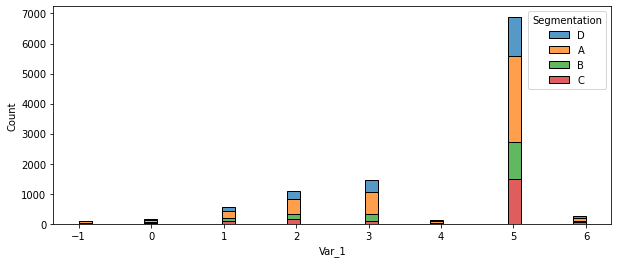

In [92]:
plt.figure(figsize=(10,4))
ax = sns.histplot(data=ds, x="Var_1", hue='Segmentation', multiple="stack")

## Discretization

In [94]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10650 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              10650 non-null  int64 
 1   Gender          10650 non-null  object
 2   Ever_Married    10650 non-null  object
 3   Age             10650 non-null  int64 
 4   Graduated       10650 non-null  object
 5   Profession      10650 non-null  object
 6   Spending_Score  10650 non-null  object
 7   Family_Size     10650 non-null  int64 
 8   Var_1           10650 non-null  int8  
 9   Segmentation    10650 non-null  object
dtypes: int64(3), int8(1), object(6)
memory usage: 842.4+ KB


In [95]:
def gender(x):
    if x=='Male':
        return 0
    else:
        return 1
        
ds.Gender = ds.Gender.apply(gender)

In [96]:
# check
np.unique(ds.Gender)

array([0, 1])

In [97]:
ds.Ever_Married = ds.Ever_Married.astype('category')

In [98]:
ds.Ever_Married 

0         No
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
10690     No
10691     No
10692     No
10693    Yes
10694     No
Name: Ever_Married, Length: 10650, dtype: category
Categories (2, object): ['No', 'Yes']

In [99]:
ds.Ever_Married = ds.Ever_Married.cat.codes

In [100]:
ds.Ever_Married 

0        0
1        1
2        1
3        1
4        1
        ..
10690    0
10691    0
10692    0
10693    1
10694    0
Name: Ever_Married, Length: 10650, dtype: int8

In [101]:
# no=0, yes=1

In [102]:
ds.Graduated = ds.Graduated.astype('category')

In [103]:
ds.Graduated

0         No
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
10690     No
10691    Yes
10692    Yes
10693    Yes
10694    Yes
Name: Graduated, Length: 10650, dtype: category
Categories (2, object): ['No', 'Yes']

In [104]:
ds.Graduated = ds.Graduated.cat.codes

In [105]:
ds.Graduated

0        0
1        1
2        1
3        1
4        1
        ..
10690    0
10691    1
10692    1
10693    1
10694    1
Name: Graduated, Length: 10650, dtype: int8

In [106]:
# no=0, yes=1

In [107]:
ds.Profession = ds.Profession.astype('category')
ds.Profession = ds.Profession.cat.codes

In [108]:
# check
np.unique(ds.Profession)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)

In [109]:
ds.Spending_Score = ds.Spending_Score.astype('category')
ds.Spending_Score = ds.Spending_Score.cat.codes

In [110]:
# check
np.unique(ds.Spending_Score)

array([0, 1, 2], dtype=int8)

In [111]:
ds.Segmentation = ds.Segmentation.astype('category')
ds.Segmentation = ds.Segmentation.cat.codes

In [112]:
# check
np.unique(ds.Segmentation)

array([0, 1, 2, 3], dtype=int8)

In [113]:
ds.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,0,5,2,4,3,3
1,462643,1,1,38,1,2,0,3,3,0
2,466315,1,1,67,1,2,2,1,5,1
3,461735,0,1,67,1,7,1,2,5,1
4,462669,1,1,40,1,3,1,6,5,0


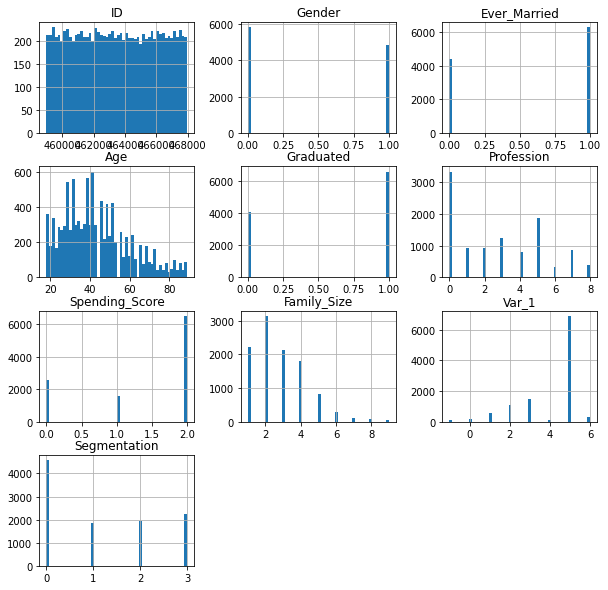

In [114]:
# feature distributions
ds.hist(bins = 50, figsize = (10,10) )
plt.show()

## Correlation Analysis

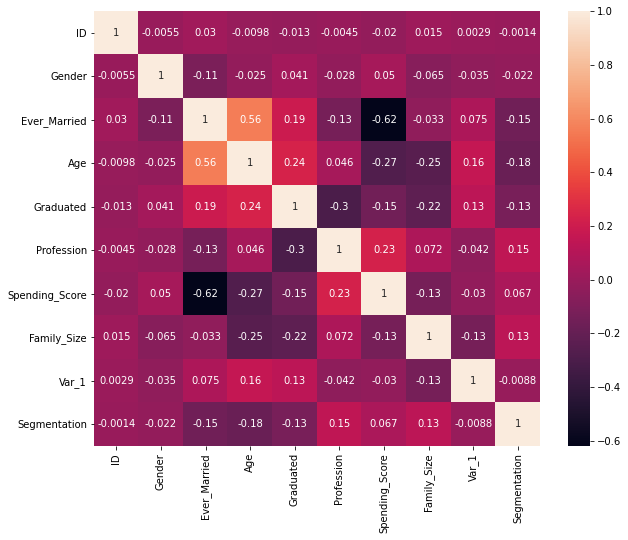

In [ ]:
plt.figure(figsize=(10,8))
fig = sns.heatmap(ds.corr(), annot=True)
plt.show()

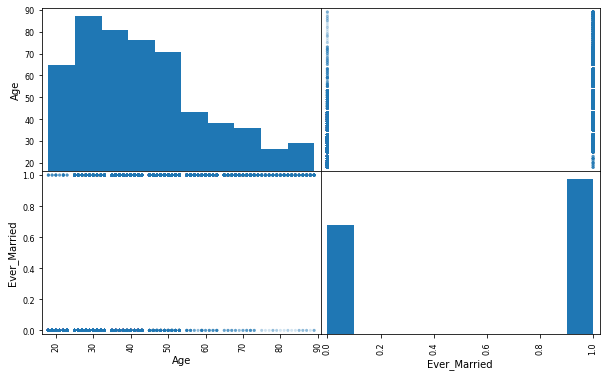

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Age', 'Ever_Married']
scatter_matrix(ds[attributes], figsize=(10,6),alpha=0.2)
plt.show()

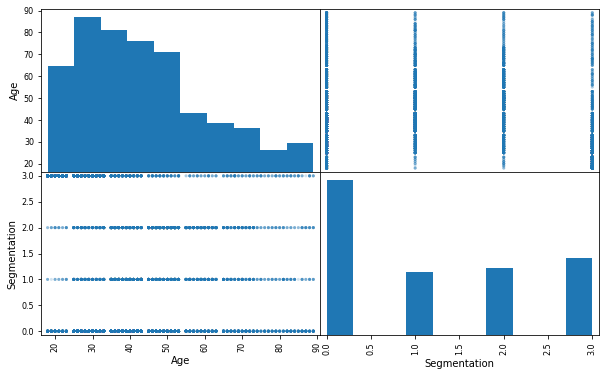

In [ ]:
attributes = ['Age','Segmentation']

scatter_matrix(ds[attributes], figsize=(10,6),alpha=0.2)
plt.show()

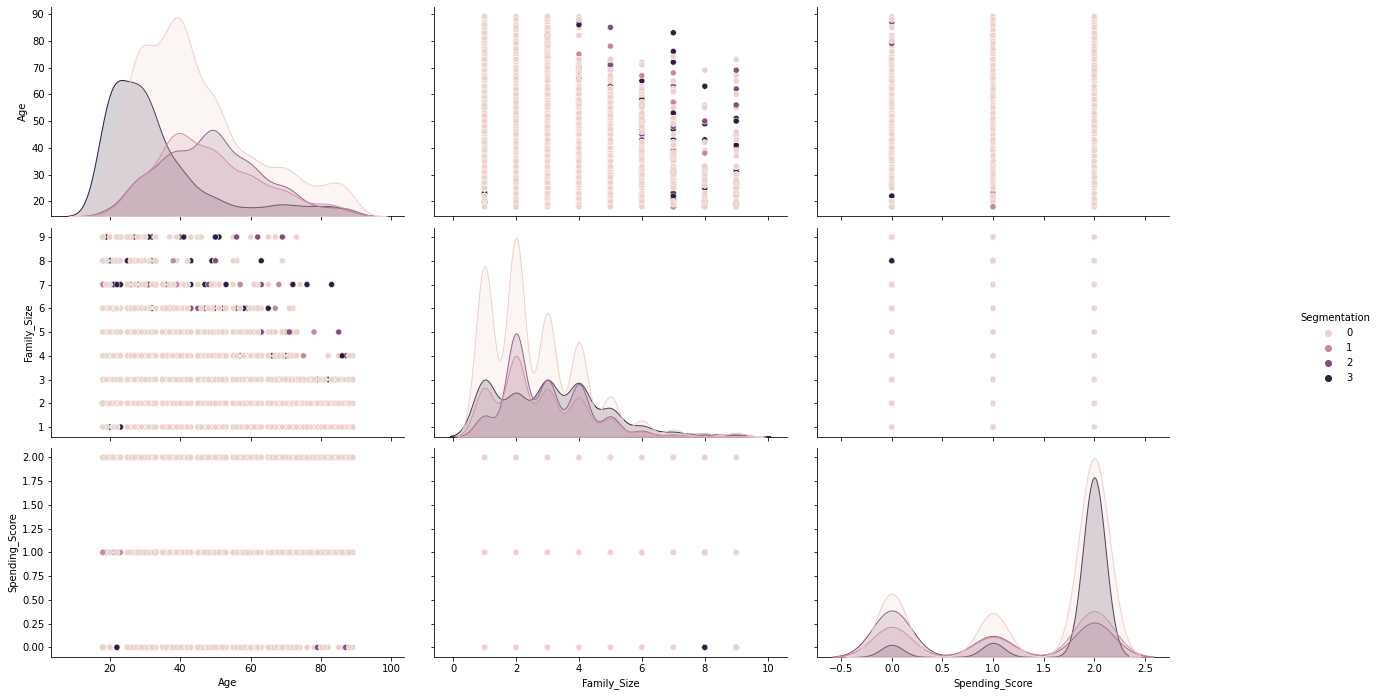

In [ ]:
attributes = ['Age', 'Family_Size', 'Spending_Score']

g = sns.pairplot(ds,
                 x_vars = attributes,
                 y_vars = attributes,
                 hue='Segmentation',
                 diag_kind='kde',
                 diag_kws={'alpha':0.2},
               )
g.fig.set_size_inches(20,10)

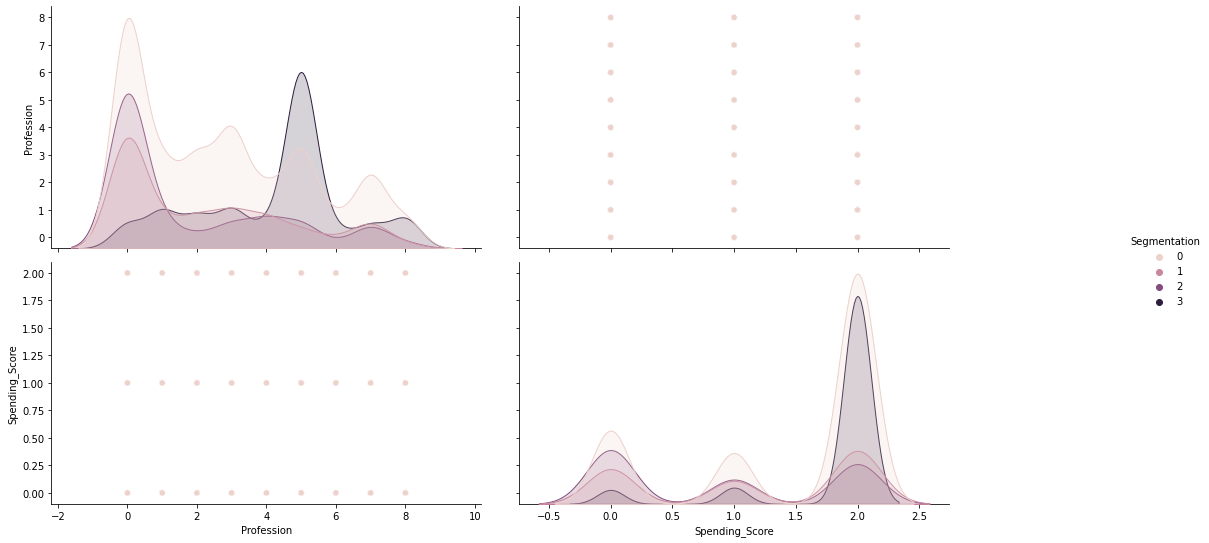

In [ ]:
attributes = ['Profession', 'Spending_Score']
g= sns.pairplot(ds,
                 x_vars = attributes,
                 y_vars = attributes,
                 hue='Segmentation',
                 diag_kind='kde',
                 diag_kws={'alpha':0.2},
               )
g.fig.set_size_inches(18,8)

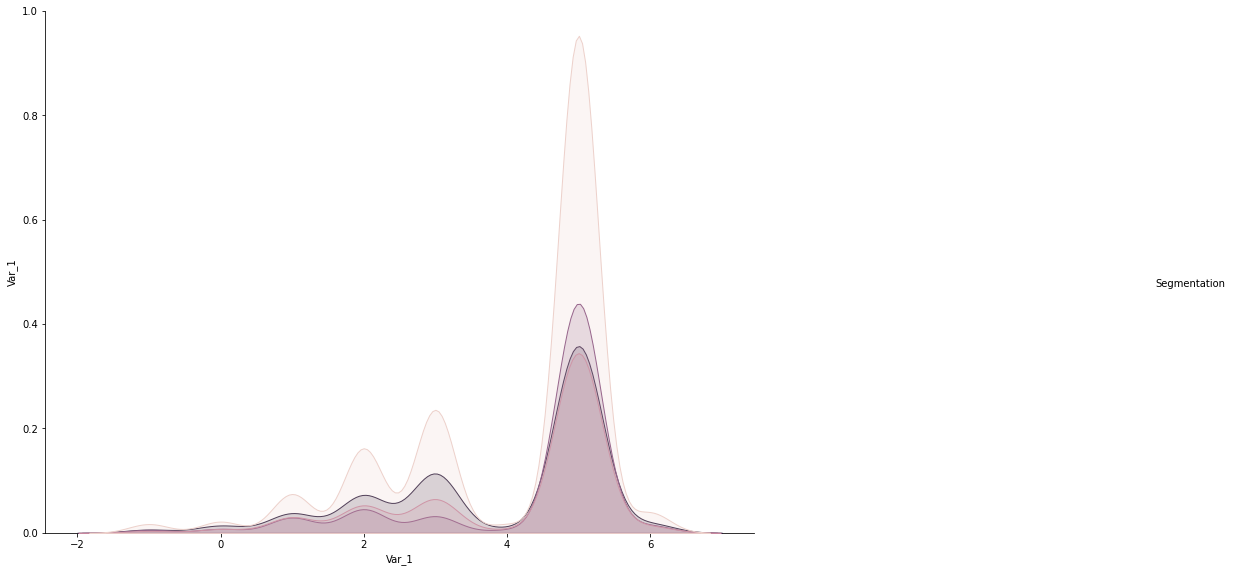

In [ ]:
attributes = ['Var_1']

g = sns.pairplot(ds,
                 x_vars = attributes,
                 y_vars = attributes,
                 hue='Segmentation',
                 diag_kind='kde',
                 diag_kws={'alpha':0.2},
               )
g.fig.set_size_inches(20,10)

Possiamo dire che non esistono attributi direttamente dipendenti gli uni dagli altri e che quindi possono essere riscritti come combinazioni tra di loro. Quindi non aggiungiamo altre modifiche agli attributi.

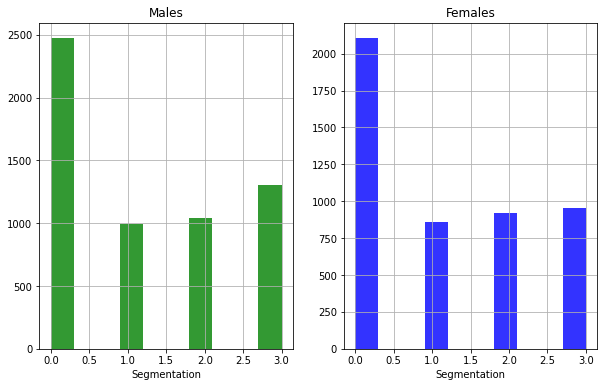

In [ ]:
male = ds[ds['Gender']==0]
female = ds[ds['Gender']==1]
fix, axes = plt.subplots(1,2, figsize=(10,6))
axes[0].hist(male['Segmentation'], alpha=0.8, color='green')
axes[1].hist(female['Segmentation'], alpha=0.8, color='blue')
axes[0].set_title('Males')
axes[1].set_title('Females')
axes[0].set_xlabel('Segmentation')
axes[1].set_xlabel('Segmentation')
axes[0].grid(True)
axes[1].grid(True)
plt.show()

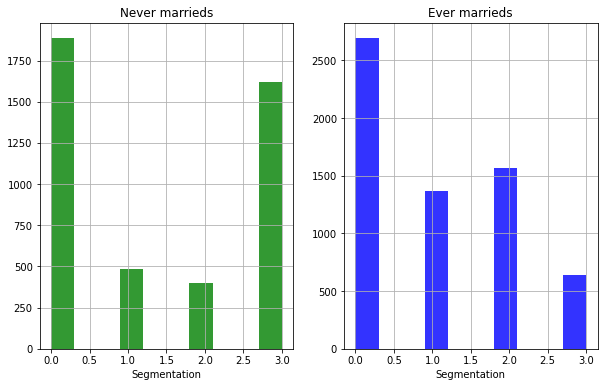

In [ ]:
never_married = ds[ds['Ever_Married']==0]
ever_married = ds[ds['Ever_Married']==1]
fix, axes = plt.subplots(1,2, figsize=(10,6))
axes[0].hist(never_married['Segmentation'], alpha=0.8, color='green')
axes[1].hist(ever_married['Segmentation'], alpha=0.8, color='blue')
axes[0].set_title('Never marrieds')
axes[1].set_title('Ever marrieds')
axes[0].set_xlabel('Segmentation')
axes[1].set_xlabel('Segmentation')
axes[0].grid(True)
axes[1].grid(True)
plt.show()

Nel segmento 3 ci sono molto più clienti mai sposati. Nei segmenti 1 e 2 invece la maggior parte sono sposati. In relazione alla family size, invece abbiamo:

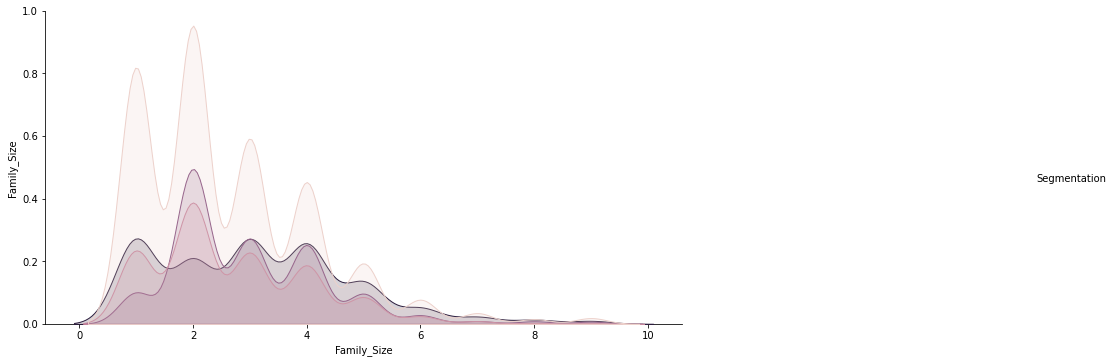

In [ ]:
attributes = ['Family_Size']

g = sns.pairplot(ds,
                 x_vars = attributes,
                 y_vars = attributes,
                 hue='Segmentation',
                 diag_kind='kde',
                 diag_kws={'alpha':0.2},
               )
g.fig.set_size_inches(18,6)

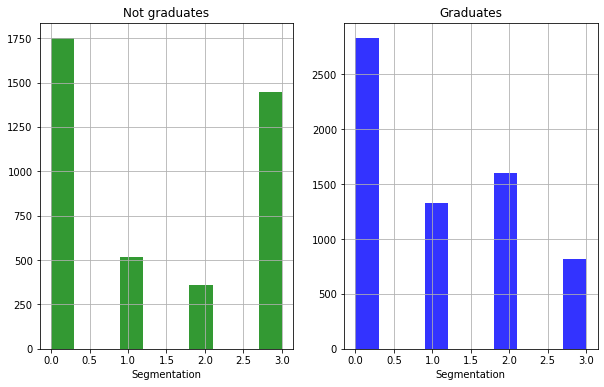

In [ ]:
not_graduated = ds[ds['Graduated']==0]
graduated = ds[ds['Graduated']==1]
fix, axes = plt.subplots(1,2, figsize=(10,6))
axes[0].hist(not_graduated['Segmentation'], alpha=0.8, color='green')
axes[1].hist(graduated['Segmentation'], alpha=0.8, color='blue')
axes[0].set_title('Not graduates')
axes[1].set_title('Graduates')
axes[0].set_xlabel('Segmentation')
axes[1].set_xlabel('Segmentation')
axes[0].grid(True)
axes[1].grid(True)
plt.show()

## Prepare data for classification

In [ ]:
df = ds.copy()

In [ ]:
df.shape

(10650, 10)

In [ ]:
test_labels = pd.read_csv("sample_submission.csv")

In [ ]:
test_index = test_labels.ID

In [ ]:
len(test_index)

2627

In [ ]:
train_index = train.ID

In [ ]:
len(train_index)

8068

In [ ]:
test_set = df.loc[df['ID'].isin(test_index)]

In [ ]:
test_set

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation
1,462643,1,1,38,1,2,0,3,3,0
2,466315,1,1,67,1,2,2,1,5,1
4,462669,1,1,40,1,3,1,6,5,0
5,461319,0,1,56,0,0,0,2,5,2
9,465176,1,1,55,1,0,0,4,5,2
...,...,...,...,...,...,...,...,...,...,...
10690,467954,0,0,29,0,5,2,4,5,0
10691,467958,1,0,35,1,1,2,1,5,0
10692,467960,1,0,53,1,3,2,2,5,0
10693,467961,0,1,47,1,4,1,5,3,0


In [ ]:
test_set = test_set.drop_duplicates(subset=['ID'])

In [ ]:
test_set

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation
1,462643,1,1,38,1,2,0,3,3,0
2,466315,1,1,67,1,2,2,1,5,1
4,462669,1,1,40,1,3,1,6,5,0
5,461319,0,1,56,0,0,0,2,5,2
9,465176,1,1,55,1,0,0,4,5,2
...,...,...,...,...,...,...,...,...,...,...
10675,467913,0,1,48,1,0,2,1,5,0
10680,467930,0,1,45,1,3,0,2,5,0
10684,467938,0,1,46,1,3,2,1,1,0
10692,467960,1,0,53,1,3,2,2,5,0


In [ ]:
training_set = df.loc[df['ID'].isin(train_index)]

In [ ]:
training_set = training_set.drop_duplicates(subset=['ID'])

In [ ]:
training_set

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,0,5,2,4,3,3
1,462643,1,1,38,1,2,0,3,3,0
2,466315,1,1,67,1,2,2,1,5,1
3,461735,0,1,67,1,7,1,2,5,1
4,462669,1,1,40,1,3,1,6,5,0
...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,22,0,5,2,7,0,3
8064,464685,0,0,35,0,4,2,4,3,3
8065,465406,1,0,33,1,5,2,1,5,3
8066,467299,1,0,27,1,5,2,4,5,1


In [ ]:
test_set.shape[0]+training_set.shape[0]

10650

In [ ]:
df.shape[0]

10650

In [ ]:
training_labels = training_set.Segmentation
test_labels = test_set.Segmentation
training_set = training_set.drop(columns=['Segmentation','ID'])
test_set = test_set.drop(columns=['Segmentation','ID'])

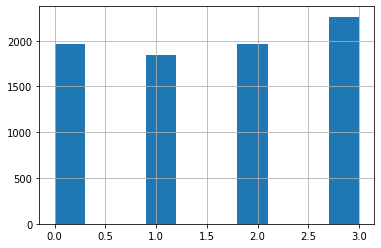

In [ ]:
training_labels.hist()

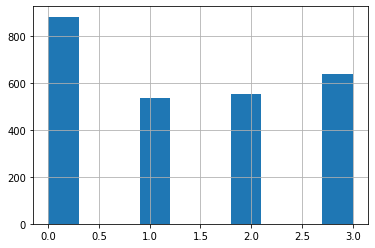

In [ ]:
test_labels.hist()

# Client Segmentation - Classification

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


def accuracy_media(y_train,y_pred):
    somma1 = 0
    for i in range(0,4):
        y_train_i = np.where(y_train == i, True, False)
        y_pred_i = np.where(y_pred == i, True, False)
        score = accuracy_score(y_train_i, y_pred_i)
        somma1 += score
    average1=somma1 / 4
    print("Accuracy Average:",average1,"\n")    
    return average1

def recall_media(y_train,y_pred):
    somma2 = 0
    for i in range(0,4):
        y_train_i = np.where(y_train == i, True, False)
        y_pred_i = np.where(y_pred == i, True, False)
        score = recall_score(y_train_i, y_pred_i)
        somma2 += score
    average2=somma2 / 4
    print("Recall Average:",average2,"\n")    
    return average2

def precision_media(y_train,y_pred):
    somma3 = 0
    for i in range(0,4):
        y_train_i = np.where(y_train == i, True, False)
        y_pred_i = np.where(y_pred == i, True, False)
        score = precision_score(y_train_i, y_pred_i)
        somma3 += score
    average3=somma3 / 4
    print("Precision Average:",average3,"\n")    
    return average3

def f1_score_medio(y_train,y_pred):
    somma4 = 0
    for i in range(0,4):
        y_train_i = np.where(y_train == i, True, False)
        y_pred_i = np.where(y_pred == i, True, False)
        score = f1_score(y_train_i, y_pred_i)
        somma4 += score
    average4=somma4 / 4
    print("F1 Score Average:",average4,"\n")    
    return average4


def compute_Average(y_train,y_pred):
    return (accuracy_media(y_train,y_pred),recall_media(y_train,y_pred),precision_media(y_train,y_pred),f1_score_medio(y_train,y_pred))

### Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTree_clf = DecisionTreeClassifier().fit(training_set, training_labels)

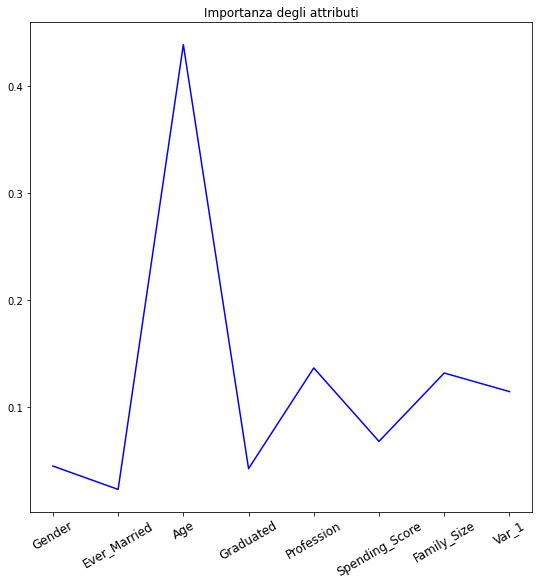

In [ ]:
nameCol=training_set.columns
fig, ax = plt.subplots(1,1)
fig.set_size_inches(9,9)
ax.plot(DTree_clf.feature_importances_,'b-')

ax.set_xticks([i for i in range(len(nameCol))])
xlabels = ax.set_xticklabels(nameCol,rotation=30, fontsize=12)
_=ax.set_title('Importanza degli attributi')

In [ ]:
impurità = pd.Series(DTree_clf.tree_.impurity)
print("Frazione di nodi puri: %.2f %%\n" %((1 - impurità[impurità > 0.].count()/impurità.count())*100))

Frazione di nodi puri: 40.86 %



In [ ]:
y_pred_dt= DTree_clf.predict(test_set)
accuracy, recall, precision, f1 = compute_Average(y_pred_dt,test_labels)
name="dtree"

Accuracy Average: 0.9107756973633933 

Recall Average: 0.8184247733444884 

Precision Average: 0.8337945390343681 

F1 Score Average: 0.8233202408257183 



## Ensemble methods

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, criterion='gini')
rnd_clf.fit(training_set,training_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rnd= rnd_clf.predict(test_set)
accuracy, recall, precision, f1 = compute_Average(y_pred_rnd,test_labels)
name="rnd"

Accuracy Average: 0.9044707680550249 

Recall Average: 0.8081542566926179 

Precision Average: 0.8264432999278397 

F1 Score Average: 0.80981961519637 



### AdaBoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost_clf = AdaBoostClassifier(base_estimator=DTree_clf, n_estimators=100,
algorithm="SAMME", learning_rate=0.5, random_state=42)
adaBoost_clf.fit(training_set, training_labels)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

In [ ]:
y_pred_boost= adaBoost_clf.predict(test_set)
accuracy, recall, precision, f1 = compute_Average(y_pred_boost,test_labels)

Accuracy Average: 0.9048528849828047 

Recall Average: 0.8136363779133295 

Precision Average: 0.8304750010051323 

F1 Score Average: 0.8095065786891242 



### Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('rnd', rnd_clf), ('ada', adaBoost_clf), ('dt', DTree_clf)], voting='hard')
voting_clf.fit(training_set, training_labels)

VotingClassifier(estimators=[('rnd',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
       

In [ ]:
y_pred_vot= voting_clf.predict(test_set)
accuracy, recall, precision, f1 = compute_Average(y_pred_vot,test_labels)

Accuracy Average: 0.9056171188383646 

Recall Average: 0.809230352036123 

Precision Average: 0.8273858773372675 

F1 Score Average: 0.8125844424917276 



### AUC

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

def auc_media(y_train,y_pred):
    somma = 0
    for i in range(0,4):
        y_train_i = np.where(y_train == i, True, False)
        y_pred_i = np.where(y_pred == i, True, False)
        score = roc_auc_score(y_train_i, y_pred_i)
        somma += score
    average=somma / 4
    print("AUC Average:",average,"\n")    
    return average

In [ ]:
auc = auc_media(test_labels, y_pred_dt) # for decision tree classifier

AUC Average: 0.8872383341570127 



### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import *

def plot_confusion_matrix(y_true, y_pred, classes, 
                          classes_value,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes_value, yticklabels=classes_value,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[638  77  90  79]
 [ 41 469  24   5]
 [ 34  44 468   7]
 [ 28  27  11 575]]


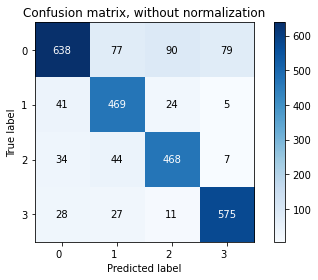

In [ ]:
classes_value = ["0", "1", "2", "3"]
test_pred = DTree_clf.predict(test_set)
plot_confusion_matrix(test_labels, test_pred, classes=df.Segmentation, classes_value=classes_value)